In [211]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
# import the data
employee_data = pd.read_csv("employees.csv")

industry_mapping = {
    "Books": 1,
    "Electronics": 2,
    "Industrial": 3,
    "Games": 4,
    "Clothing": 5,
    "Toys": 6,
    "Music": 7,
    "Grocery": 8,
    "Home": 9,
}

employee_data["industry"] = employee_data["industry"].replace(industry_mapping)
employee_data = employee_data.sample(frac=1).reset_index(drop=True)

print(employee_data)

        company  industry  annual_revenue  no_employees  no_female_employees
0    Jabbercube         9         1051986            24                    2
1      Feedfire         3          840956            62                   22
2    Thoughtmix         6          519316            26                    4
3        Meeveo         6          726836            28                    9
4      Realfire         2         4885856            37                    6
..          ...       ...             ...           ...                  ...
995     Wordify         6          890548            28                    2
996      Avamba         6          885739            19                    9
997        Yodo         3         1800104            65                   11
998        Mymm         1          208999            12                    8
999      Meevee         2         3409268            46                    1

[1000 rows x 5 columns]


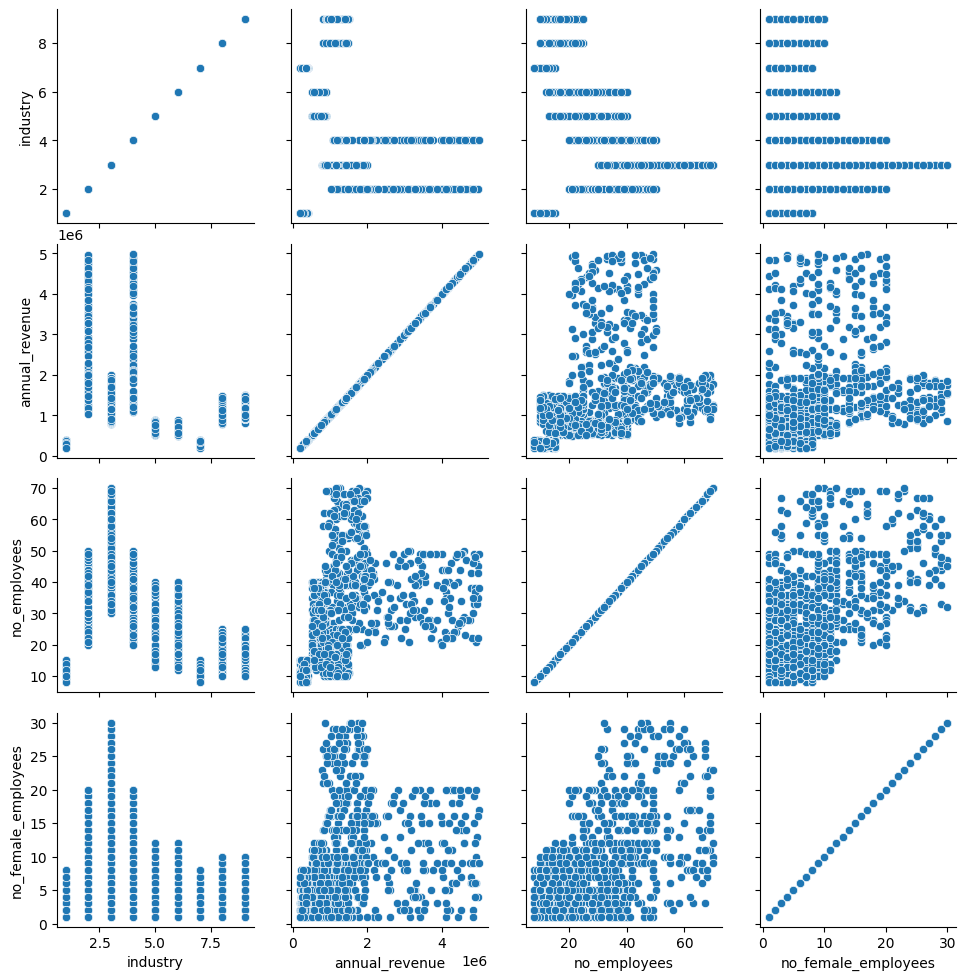

In [237]:
g = sns.PairGrid(employee_data)
g.map(sns.scatterplot)

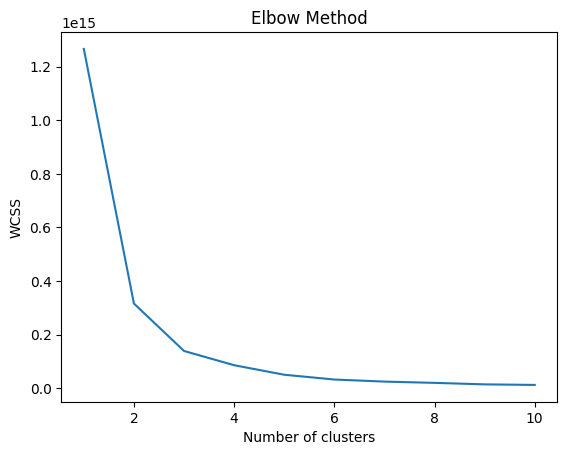

In [238]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(employee_data.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

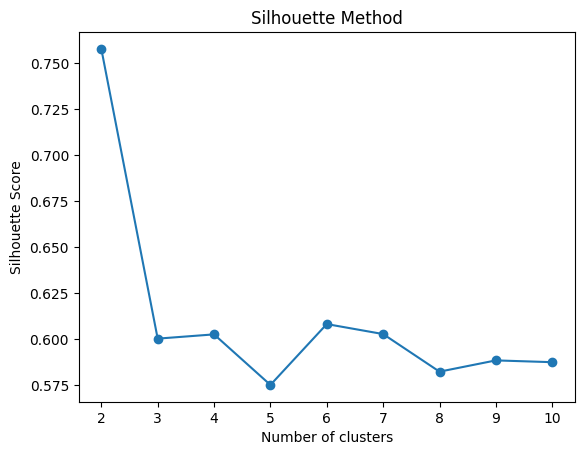

In [239]:
from sklearn.metrics import silhouette_score

# Range of clusters to test
cluster_range = range(2, 11)
silhouette_scores = []

# Compute silhouette score for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(employee_data.iloc[:, 1:])
    silhouette_avg = silhouette_score(employee_data.iloc[:, 1:], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(cluster_range, silhouette_scores, marker="o")
plt.title("Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [241]:
# silhouette_scores = []

# for n_clusters in range(2, 11):
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     cluster_labels = kmeans.fit_predict(scaled_features)
#     silhouette_avg = silhouette_score(scaled_features, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# optimal_num_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
# print("Optimal number of clusters based on silhouette score:", optimal_num_clusters)

kmeans = KMeans(n_clusters=7, random_state=42)
# kmeans.fit(scaled_features)
kmeans.fit(employee_data.iloc[:, 1:])

KMeans(n_clusters=7, random_state=42)

In [242]:
employee_data["cluster"] = kmeans.labels_
employee_data["cluster"] = employee_data["cluster"] + 1
print(employee_data.head())

         company  industry  annual_revenue  no_employees  no_female_employees  \
0  Thoughtsphere         9         1267604            16                    1   
1          Jamia         6          741322            38                    1   
2         Zoozzy         3         1725324            47                   11   
3    Shufflebeat         5          573008            16                    6   
4          Mynte         7          214087            15                    8   

   cluster  
0        1  
1        5  
2        7  
3        5  
4        4  


In [ ]:
print(
    "Silhouette Score:", silhouette_score(employee_data[:, 1:], employee_data["cluster"])
)

In [244]:
from sklearn.manifold import TSNE
import plotly.express as px

fig = px.scatter(
    x=employee_data["no_employees"],
    y=employee_data["annual_revenue"],
    color=employee_data.cluster,
    labels={"color": "cluster"},
)
fig.show()

In [248]:
for i, rec in employee_data.iterrows():
    # Predict clusters for new data
    new_cluster_labels = kmeans.predict([list(rec)[2:]])

    print(new_cluster_labels)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py

[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py

In [202]:
import os
import pandas as pd

# Directory where your CSV files are located
directory = "/Users/npatil14/Downloads"

# Initialize an empty list to store dataframes
all_dataframes = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        # Read the CSV file into a dataframe
        df = pd.read_csv(filepath)
        # Append the dataframe to the list
        all_dataframes.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(all_dataframes, ignore_index=True)

# Export the combined dataframe to a new CSV file
combined_df.to_csv("/Users/npatil14/Downloads/Code/PyPy/KMeans/employees.csv", index=False)

print("Combined CSV file has been created successfully.")

Combined CSV file has been created successfully.
